In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.utils import to_categorical
import os
from keras.preprocessing.image import ImageDataGenerator, load_img


import tensorflow as tf


Using TensorFlow backend.


In [2]:
from keras.applications import InceptionV3


vgg_conv = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [3]:
train_dir = '/home/peter/LCDtest/train_data'
validation_dir  = '/home/peter/LCDtest/validation_data'
validation_mini_batch_dir = './complete_dataset/validation_real_images'

nTrain = 29*100
nVal = 29*5
nVal_mini_batch = 5
numClases = 29

In [4]:
datagen = ImageDataGenerator(rescale=1./256)
batch_size = 20
#vgg16
#train_features = np.zeros(shape=(nTrain, 7, 7, 512))
#inception
train_features = np.zeros(shape=(nTrain, 5, 5, 2048))

train_labels = np.zeros(shape=(nTrain,numClases))

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)
print("train generator")

i = 0
for inputs_batch, labels_batch in train_generator:
    features_batch = vgg_conv.predict(inputs_batch)
    train_features[i * batch_size : (i + 1) * batch_size] = features_batch
    train_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    print(i * batch_size)
    print(nTrain)
    if i * batch_size >= nTrain:
        break

#vgg16        
#train_features = np.reshape(train_features, (nTrain, 7 * 7 * 512))
#inception
train_features = np.reshape(train_features, (nTrain, 5 * 5 * 2048))
np.set_printoptions(threshold=100)

Found 2900 images belonging to 29 classes.
train generator
20
2900
40
2900
60
2900
80
2900
100
2900
120
2900
140
2900
160
2900
180
2900
200
2900
220
2900
240
2900
260
2900
280
2900
300
2900
320
2900
340
2900
360
2900
380
2900
400
2900
420
2900
440
2900
460
2900
480
2900
500
2900
520
2900
540
2900
560
2900
580
2900
600
2900
620
2900
640
2900
660
2900
680
2900
700
2900
720
2900
740
2900
760
2900
780
2900
800
2900
820
2900
840
2900
860
2900
880
2900
900
2900
920
2900
940
2900
960
2900
980
2900
1000
2900
1020
2900
1040
2900
1060
2900
1080
2900
1100
2900
1120
2900
1140
2900
1160
2900
1180
2900
1200
2900
1220
2900
1240
2900
1260
2900
1280
2900
1300
2900
1320
2900
1340
2900
1360
2900
1380
2900
1400
2900
1420
2900
1440
2900
1460
2900
1480
2900
1500
2900
1520
2900
1540
2900
1560
2900
1580
2900
1600
2900
1620
2900
1640
2900
1660
2900
1680
2900
1700
2900
1720
2900
1740
2900
1760
2900
1780
2900
1800
2900
1820
2900
1840
2900
1860
2900
1880
2900
1900
2900
1920
2900
1940
2900
1960
2900
1980
2900
2000

In [21]:
validation_features = np.zeros(shape=(nVal, 5, 5, 2048))
validation_labels = np.zeros(shape=(nVal,numClases))

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

i = 0

for inputs_batch, labels_batch in validation_generator:
    features_batch = vgg_conv.predict(inputs_batch)
    validation_features[i * batch_size : (i + 1) * batch_size] = features_batch
    validation_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    print(i)
    if i * batch_size >= nVal:
        break


validation_features = np.reshape(validation_features, (nVal, 5 * 5 * 2048))


Found 145 images belonging to 29 classes.
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


### Create your own model and train the network

In [8]:
from keras import models
from keras import layers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling1D, GlobalAveragePooling1D, Dense


model = models.Sequential()
model.add(layers.Dense(640, activation='relu'))
model.add(layers.Dense(640, activation='relu'))
model.add(layers.Dense(640, activation='relu'))
model.add(layers.Dense(640, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(numClases, activation='sigmoid'))


optimizer=optimizers.RMSprop(lr=2e-5)
model.compile(optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_features,
                    train_labels,
                    epochs=4,
                    batch_size=batch_size)

Epoch 1/4
2900/2900 [==============================] - 404s 139ms/step - loss: 0.0596 - acc: 0.9850
Epoch 2/4
2900/2900 [==============================] - 384s 132ms/step - loss: 0.0014 - acc: 0.9998
Epoch 3/4
2900/2900 [==============================] - 405s 140ms/step - loss: 2.6377e-04 - acc: 0.9999
Epoch 4/4
2900/2900 [==============================] - 383s 132ms/step - loss: 9.0878e-05 - acc: 1.0000


In [ ]:
#model1=models.Sequential()
#model1.add(vgg_conv)
#model1.add(model)

In [22]:
fnames = validation_generator.filenames
ground_truth = validation_generator.classes
label2index = validation_generator.class_indices

# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())

In [23]:
predictions = model.predict_classes(validation_features)
prob = model.predict(validation_features)
predictions

array([ 0, 28,  0, 24, 15,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13,
       13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20,
       20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23,
       23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27,
       27, 27, 27, 27, 28, 28, 28, 28, 28])

In [24]:
errors = np.where(predictions != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),nVal))

No of errors = 3/145


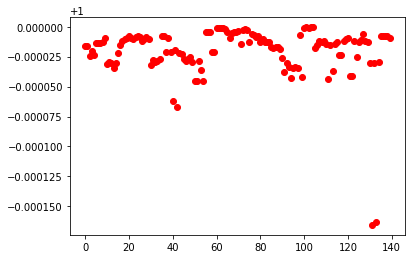

In [36]:
np.set_printoptions(threshold=np.nan)
predictions

maxvals= np.array([])
for i in range(0,len(prob)):
    #plt.plot(prob[i])
    maxvals= np.append(maxvals,np.max(prob[i]))
    #print(np.max(prob[i]))
plt.plot(maxvals[5:145],'ro')  
#np.column_stack((fnames,maxvals))[0:580]


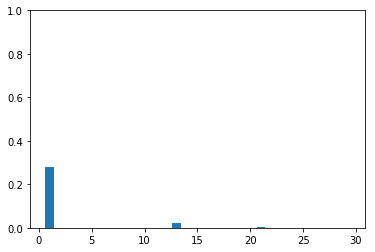

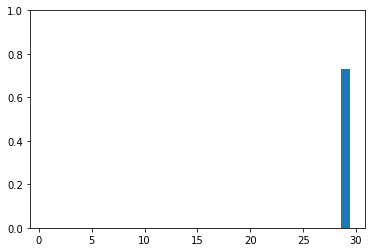

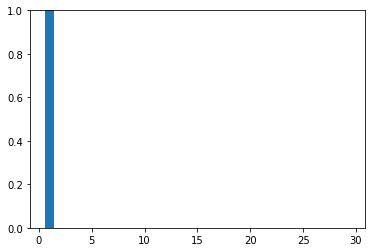

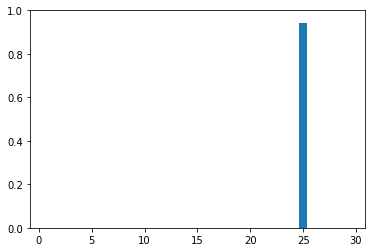

In [37]:
for i in range(4):
    a=prob[i].tolist()
    plt.bar(range(1,30),a)
    plt.ylim(0,1)
    plt.show()


In [40]:
prob[3]

array([3.84244546e-12, 1.62792901e-07, 2.39006312e-07, 1.69659328e-10,
       8.04961253e-09, 1.62749744e-11, 6.48763353e-06, 3.94040513e-13,
       3.31828419e-11, 4.12924590e-11, 4.35383117e-04, 9.00166786e-09,
       6.39709260e-13, 4.01706358e-14, 3.40448416e-12, 1.96372367e-12,
       3.65909941e-10, 1.05816515e-10, 5.00813245e-11, 1.04201760e-07,
       3.24669114e-09, 3.47129378e-12, 6.70032779e-12, 1.67456947e-05,
       9.41503823e-01, 9.12369444e-07, 2.76856547e-08, 2.19601670e-09,
       2.35420537e-11], dtype=float32)